In [101]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re 
import string
import math
import textstat
import nltk
#from textwrap import wrap
from wordcloud import WordCloud
from PIL import Image
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.util import ngrams

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import warnings

In [3]:
df = pd.read_csv(r'D:\Datasets\lublin\tweets.csv')
df


,Unnamed: 0,Time,User,Tweet
0,0,2022-12-28 05:42:33+00:00,SixDegrees9,RT @MartyTa94849826: When Trump lost in 2020 h...
1,1,2022-12-28 05:41:10+00:00,susanjsee,RT @MartyTa94849826: When Trump lost in 2020 h...
2,2,2022-12-28 05:36:45+00:00,Srinivas2540,"RT @livemint: ""In case of minor YouTubers, tax..."
3,3,2022-12-28 05:36:31+00:00,grandmagrit,RT @MartyTa94849826: When Trump lost in 2020 h...
4,4,2022-12-28 05:20:50+00:00,business_today,#AskMoneyToday | The increasing medical inflat...
...,...,...,...,...
95,95,2022-12-27 19:47:18+00:00,dmellieon,RT @CNET: Wesson used genetically modified ing...
96,96,2022-12-27 19:37:56+00:00,detroitnews,Millennial Money: Is meal kit delivery still w...
97,97,2022-12-27 19:32:33+00:00,KULDEEP20214O,RT @gganeshhh: Child youtubers are paying inco...
98,98,2022-12-27 19:30:08+00:00,DasFintechBot,RT @FinancialSpring: We’re here to make borrow...


# Basic obsvs

In [7]:
df.isna().sum()
df.isnull().values.any()


False

Apparently there are no null values in our ds.

In [5]:
print('Count of columns in the data is:', len(df.columns))
print('Count of rows in the data is:', len(df))

Count of columns in the data is: 4
Count of rows in the data is: 100


In [6]:
df.dtypes

Unnamed: 0     int64
Time          object
User          object
Tweet         object
dtype: object

Analysing the Length


In [70]:
tweet_len = df['Tweet'].str.len()
tweet_len
avg_len = round(sum(tweet_len)/len(tweet_len))
print("Length of an average tweet: ", avg_len)
max_length = max(tweet_len)
min_length = min(tweet_len)
print("The Max length of the Tweets: ",max_length);
print("The Min Length of the Tweets: ", min_length);

Length of an average tweet:  120
The Max length of the Tweets:  139
The Min Length of the Tweets:  75


<ipython-input-96-1f1794dd3420>:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5,alpha = 0.2)


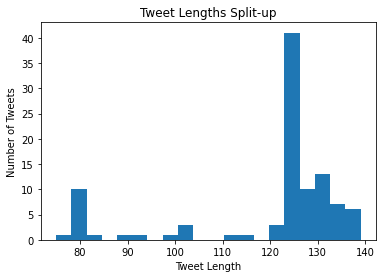

In [96]:
plt.hist(tweet_len, bins=20)
plt.xlabel("Tweet Length")
plt.ylabel("Number of Tweets")
plt.title("Tweet Lengths Split-up")
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5,alpha = 0.2)
plt.show()

# Analysing the Polarity of Tweets

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores(df)

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

So in this case the text being analyzed has no negative or positive sentiment and is completely neutral, according to the Vader library.


# Words and their frequency

In [111]:
# Coverting to lower case
df['Tweet']= df['Tweet'].str.lower()

# Create a list of all the words in the column
tw_con = ' '.join(df['Tweet']).split()
print(tw_con)
print('\nNumber of total words in the Tweet:', len(tw_con))

['rt', 'martyta', 'when', 'trump', 'lost', 'in', 'he', 'still', 'owed', 'russia', 'for', 'saving', 'his', 'company', 'and', 'his', 'personal', 'wealth', 'when', 'no', 'one', 'else', 'would', 'loa…', 'rt', 'martyta', 'when', 'trump', 'lost', 'in', 'he', 'still', 'owed', 'russia', 'for', 'saving', 'his', 'company', 'and', 'his', 'personal', 'wealth', 'when', 'no', 'one', 'else', 'would', 'loa…', 'rt', 'livemint', 'in', 'case', 'of', 'minor', 'youtubers', 'taxability', 'of', 'such', 'income', 'gets', 'complex', 'as', 'the', 'income', 'of', 'minors', 'is', 'ordinarily', 'clubbed', 'with', 'parent…', 'rt', 'martyta', 'when', 'trump', 'lost', 'in', 'he', 'still', 'owed', 'russia', 'for', 'saving', 'his', 'company', 'and', 'his', 'personal', 'wealth', 'when', 'no', 'one', 'else', 'would', 'loa…', 'askmoneytoday', 'the', 'increasing', 'medical', 'inflation', 'has', 'necessitated', 'the', 'need', 'for', 'an', 'adequate', 'sum', 'insured', 'in', 'your', 'hea…', 'httpstcospkrvun', 'rt', 'martyta'

In [116]:
#Removing Punctuations and similarities
#remove punctuations, digits and words with digits 


df['Tweet']=df['Tweet'].apply(lambda x: re.sub('\d+','', x))
df['Tweet']=df['Tweet'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
df['Tweet']=df['Tweet'].apply(lambda x: re.sub('\d+','', x))
df['Tweet']=df['Tweet'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

# Removing extra spaces
df['Tweet']=df['Tweet'].apply(lambda x: re.sub(' +',' ',x))
df['Tweet']=df['Tweet'].apply(lambda x: re.sub(' +',' ',x))
df["Tweet"]

0     rt martyta when trump lost in he still owed ru...
1     rt martyta when trump lost in he still owed ru...
2     rt livemint in case of minor youtubers taxabil...
3     rt martyta when trump lost in he still owed ru...
4     askmoneytoday the increasing medical inflation...
                            ...                        
95    rt cnet wesson used genetically modified ingre...
96    millennial money is meal kit delivery still wo...
97    rt gganeshhh child youtubers are paying income...
98    rt financialspring we’re here to make borrowin...
99    we’re here to make borrowing as easy as possib...
Name: Tweet, Length: 100, dtype: object

In [115]:
# Filter out the stop words

stop_words = set(stopwords.words('english'))

filtered_tweet = []
 
for w in tw_con:
    if w not in stop_words:
        filtered_tweet.append(w)
        
print(filtered_tweet)
print('\nNumber of total words in Tweet after removing stopwords:', len(filtered_title))

['rt', 'martyta', 'trump', 'lost', 'still', 'owed', 'russia', 'saving', 'company', 'personal', 'wealth', 'one', 'else', 'would', 'loa…', 'rt', 'martyta', 'trump', 'lost', 'still', 'owed', 'russia', 'saving', 'company', 'personal', 'wealth', 'one', 'else', 'would', 'loa…', 'rt', 'livemint', 'case', 'minor', 'youtubers', 'taxability', 'income', 'gets', 'complex', 'income', 'minors', 'ordinarily', 'clubbed', 'parent…', 'rt', 'martyta', 'trump', 'lost', 'still', 'owed', 'russia', 'saving', 'company', 'personal', 'wealth', 'one', 'else', 'would', 'loa…', 'askmoneytoday', 'increasing', 'medical', 'inflation', 'necessitated', 'need', 'adequate', 'sum', 'insured', 'hea…', 'httpstcospkrvun', 'rt', 'martyta', 'trump', 'lost', 'still', 'owed', 'russia', 'saving', 'company', 'personal', 'wealth', 'one', 'else', 'would', 'loa…', 'rt', 'martyta', 'trump', 'lost', 'still', 'owed', 'russia', 'saving', 'company', 'personal', 'wealth', 'one', 'else', 'would', 'loa…', 'rt', 'actusdei', 'plenty', 'investo

In [ ]:
#Analysing the usage of emojis in tweets

In [53]:
import re   #Fault - Although there are emojis present in the dataset, it shows a null value for emojis 
tweet_text = row["Tweet"]
def extract_emojis(text):
  emoji_pattern = re.compile("["
    u"\U0001f600-\U0001f64f"  # emoticons
    u"\U0001f300-\U0001f5ff"  # symbols & pictographs
    u"\U0001f680-\U0001f6ff"  # transport and map symbols
    u"\U0001f1e0-\U0001f1ff"  # flags 
    u"\U00002702-\U000027b0"
    u"\U000024C2-\U0001f251"
    "]+", flags=re.UNICODE)
  return emoji_pattern.findall(tweet_text)

emojis = extract_emojis(df)

emoji_counts = df.groupby("emojis").size().reset_index(name="count")

# Sort the data by count in descending order
emoji_counts = emoji_counts.sort_values(by="count", ascending=False)

# Print the top 10 most common emojis
print(emoji_counts.head(10))


  emojis  count
0           100


# Wordcloud of the different words and their frequent appearances


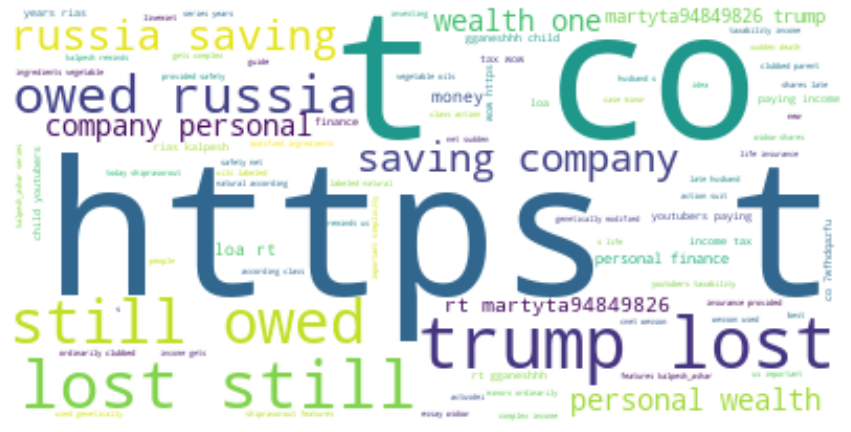

In [77]:
text = " ".join(i for i in filtered_tweet)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [78]:
test_str = text.translate(str.maketrans('', '', string.punctuation))
test_li = test_str.split(" ")
tweet_df = pd.DataFrame(test_li, columns = ['words'])

In [113]:
tweet_df['words'] = tweet_df['words'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
tweet_df['words'].replace('', np.nan, inplace=True)
tweet_df = tweet_df.dropna()
tweet_df['words'] = tweet_df['words'].str.lower()
display(display(tweet_df[0:10])[0:10])

,words
0,rt
1,martyta94849826
2,trump
3,lost
4,2020
5,still
6,owed
7,russia
8,saving
9,company


TypeError: 'NoneType' object is not subscriptable

# Analysis of Hashtags 

In [31]:
#Analysing the Hashtags 
def extract_hashtags(tweet):
  hashtags = re.findall(r'#\w+', tweet)
  return hashtags

df['hashtags'] = df['Tweet'].apply(extract_hashtags)
all_hashtags = []
for hashtags in df['hashtags']:
  all_hashtags.extend(hashtags)




In [32]:
from collections import Counter

hashtag_counts = Counter(all_hashtags)


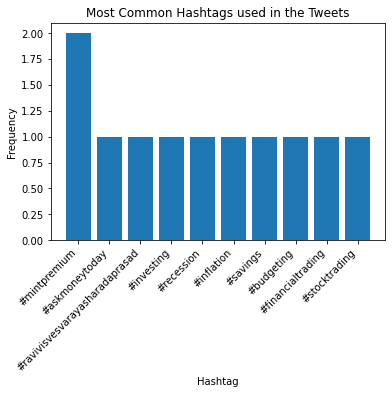

In [84]:
hashtags, counts = zip(*hashtag_counts.most_common(10))

plt.bar(hashtags, counts)
plt.title('Most Common Hashtags used in the Tweets')
plt.xlabel('Hashtag')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha ="right")
plt.show()


Inferences made are that the follwo

<ipython-input-95-5c259dd62011>:10: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)


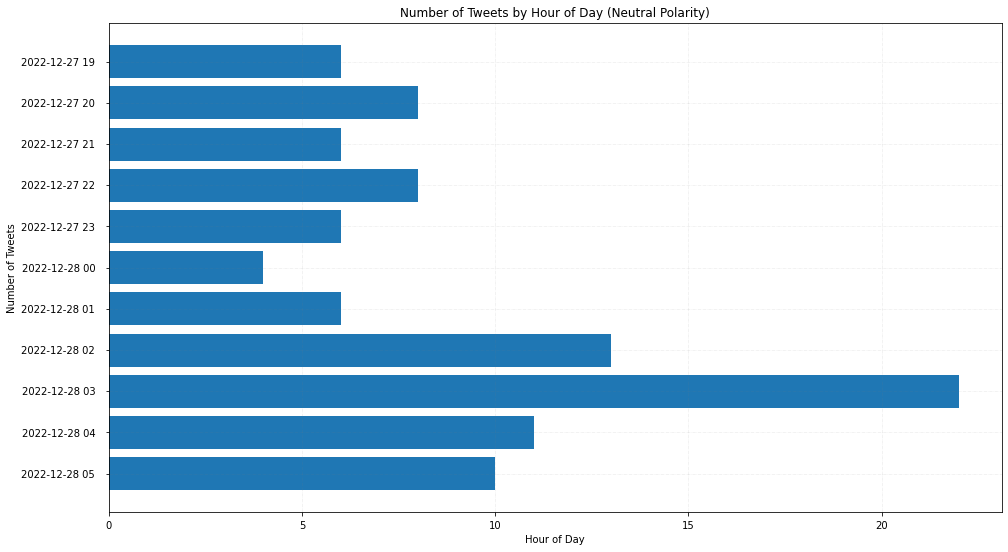

In [95]:
#Analysing the user time data
df["hour"] = df["Time"].apply(lambda x: x.split(":")[0])
tweet_counts = df.groupby("hour").size()

# Plot the tweet counts by hour as a bar chart
fig, ax = plt.subplots(figsize =(16, 9))
plt.barh(tweet_counts.index, tweet_counts.values)
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 0.5, alpha = 0.2)
ax.invert_yaxis()
plt.xlabel("Hour of Day")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets by Hour of Day (Neutral Polarity)")


plt.show()


# Finding n-grams

In [108]:
def find_ngrams(tweets, n):
    ngram_list = []
    for tweet in tweets:
        ngrams_in_tweet = ngrams(tweet.split(), n)
        ngram_list.extend(ngrams_in_tweet)
    return ngram_list

print(find_ngrams(df['Tweet'],2))


[('rt', 'martyta'), ('martyta', 'when'), ('when', 'trump'), ('trump', 'lost'), ('lost', 'in'), ('in', 'he'), ('he', 'still'), ('still', 'owed'), ('owed', 'russia'), ('russia', 'for'), ('for', 'saving'), ('saving', 'his'), ('his', 'company'), ('company', 'and'), ('and', 'his'), ('his', 'personal'), ('personal', 'wealth'), ('wealth', 'when'), ('when', 'no'), ('no', 'one'), ('one', 'else'), ('else', 'would'), ('would', 'loa…'), ('rt', 'martyta'), ('martyta', 'when'), ('when', 'trump'), ('trump', 'lost'), ('lost', 'in'), ('in', 'he'), ('he', 'still'), ('still', 'owed'), ('owed', 'russia'), ('russia', 'for'), ('for', 'saving'), ('saving', 'his'), ('his', 'company'), ('company', 'and'), ('and', 'his'), ('his', 'personal'), ('personal', 'wealth'), ('wealth', 'when'), ('when', 'no'), ('no', 'one'), ('one', 'else'), ('else', 'would'), ('would', 'loa…'), ('rt', 'livemint'), ('livemint', 'in'), ('in', 'case'), ('case', 'of'), ('of', 'minor'), ('minor', 'youtubers'), ('youtubers', 'taxability'), (

In [109]:
print(find_ngrams(df['Tweet'],3))

[('rt', 'martyta', 'when'), ('martyta', 'when', 'trump'), ('when', 'trump', 'lost'), ('trump', 'lost', 'in'), ('lost', 'in', 'he'), ('in', 'he', 'still'), ('he', 'still', 'owed'), ('still', 'owed', 'russia'), ('owed', 'russia', 'for'), ('russia', 'for', 'saving'), ('for', 'saving', 'his'), ('saving', 'his', 'company'), ('his', 'company', 'and'), ('company', 'and', 'his'), ('and', 'his', 'personal'), ('his', 'personal', 'wealth'), ('personal', 'wealth', 'when'), ('wealth', 'when', 'no'), ('when', 'no', 'one'), ('no', 'one', 'else'), ('one', 'else', 'would'), ('else', 'would', 'loa…'), ('rt', 'martyta', 'when'), ('martyta', 'when', 'trump'), ('when', 'trump', 'lost'), ('trump', 'lost', 'in'), ('lost', 'in', 'he'), ('in', 'he', 'still'), ('he', 'still', 'owed'), ('still', 'owed', 'russia'), ('owed', 'russia', 'for'), ('russia', 'for', 'saving'), ('for', 'saving', 'his'), ('saving', 'his', 'company'), ('his', 'company', 'and'), ('company', 'and', 'his'), ('and', 'his', 'personal'), ('his',